<h1 style='font-size:40px'> Unsupervised Learning Techniques</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            A tarefa do ML Não-Supervisionado é o de distinguir instâncias do dataset conforme as suas características, sem precisar de um valor-alvo.
        </li>
        <li> 
            Sua necessidade surge em casos em que não sabemos quantos ou quais tipos de instâncias existem; ou quando o volume de dados é tão grande que seria impossível humanos manualmente os rotularem. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Tipos de Unsupervised Learning</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            <em> Clustering:</em> Busca agrupar as instâncias conforme suas características.
        </li>
        <li> 
            <em> Anomaly Detection:</em> Útil para limpeza de datasets. Também é usado como detector de defeitos em linhas de produção e de novas tendências em séries temporais.
        </li>
        <li> 
            <em> Density Estimation:</em> Calcula a Probability Density Function (PDF) do processo aleatório que gerou o dataset. É comumente usado em deteção de anomalias.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Clustering</h2>
<h3 style='font-size:30px;font-style:italic'> Aplicações</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            <em>Análise de Dados:</em> Os algoritmos de clustering podem encontrar agrupamentos entre as instâncias do dataset, permitindo a nós analisá-los separadamente.
        </li>
        <li> 
            <em>Redução de Dimensionalidade:</em> As instâncias do dataset podem ter o seu grau de afinidade com os clusters medido. Dessa forma, o vetor de features é substituído por um vetor com os graus de afinidade. 
        </li>
        <li> 
            <em>Detecção de Anomalia:</em> Instâncias com baixa compatibilidade com os agrupamentos gerados podem ser rotuladas como exceções. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> K-Means</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O K-Means é um algoritmo de clustering muito conhecido. Devemos informar quantos agrupamentos pretendemos identificar ao utilizá-lo.
        </li>
        <li> 
            Ele, primeiramente, insere k centróides no plano aleatoriamente. As instâncias de treino são designadas ao núcleo mais próximo, tendo este a sua posição atualizada com a média das coordenadas dos pontos sob seu pertence. Após isso, uma nova fase de designação ocorre com os mesmos procedimentos. Esse processo se repete até que os centróides tenham as suas posições estabilizadas.
        </li>
    </ul>
</div>

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(n_samples=100, centers=4)

# Fazendo o K-Means identificar as 4 aglomerações criadas.
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

# Mostrando as previsões do K-Means.
kmeans.predict(X)

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 2, 2, 0, 3,
       1, 3, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 3, 1, 0, 1, 3, 0, 1, 2, 2, 3,
       3, 2, 2, 0, 3, 2, 1, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 3, 1, 1, 2, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 0, 1, 2,
       3, 2, 1, 2, 0, 0, 1, 3, 3, 2, 3, 2], dtype=int32)

In [4]:
# As previsões feitas sobre o dataset de treino podem ser visualizadas com o atributo 'labels_'.
kmeans.labels_

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 2, 2, 0, 3,
       1, 3, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 3, 1, 0, 1, 3, 0, 1, 2, 2, 3,
       3, 2, 2, 0, 3, 2, 1, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 3, 1, 1, 2, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 0, 1, 2,
       3, 2, 1, 2, 0, 0, 1, 3, 3, 2, 3, 2], dtype=int32)

In [5]:
# 'cluster_centers_' revela as coordenadas dos centróides.
kmeans.cluster_centers_

array([[-1.44949917, -5.2443202 ],
       [ 5.79638461,  1.25332542],
       [-7.76577522,  0.04425641],
       [-0.3300791 , -8.10858749]])

In [6]:
# O método 'transform' nos revela a distância entre as instâncias e os centróides.

# O seu output pode ser usado como substituto das features, configurando uma redução de dimensionalidade.
kmeans.transform(X)[:5]

array([[ 8.03845961, 12.5935762 ,  1.21530829, 10.9751476 ],
       [ 9.60034607, 13.94358704,  1.6384009 , 12.49150617],
       [ 0.19519209,  9.53850345,  8.28857231,  3.12933369],
       [ 1.56506234, 11.14396409,  7.43415304,  3.61625653],
       [ 0.65170673, 10.37535796,  8.06091853,  3.02222241]])

<h3 style='font-size:30px;font-style:italic'> Centroid Initialization Methods</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O K-Means possui o risco de convergir para uma solução sub-ótima. Considerando isso, há diversas maneiras de evitarmos essa situação.
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> n_init</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            n_init controla a quantidade de k-means que são executados. O modelo retornado é aquele em que as instâncias tenham a menor distância ao quadrado de seus respectivos centróides (essa métrica pode ser encontrada no atributo <em>inertia_</em>).
        </li>
    </ul>
</div>

In [7]:
# Rodaremos aqui 20 K-Means.
kmeans = KMeans(n_clusters=4,n_init=20, random_state=42).fit(X)

# A distância ao quadrado média das instâncias aos centróides.
kmeans.inertia_

165.72321794942897

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> init</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Se você vier a saber aproximadamente onde os centróides podem se localizar, passe um array do numpy com as coordenadas ao atributo <em> init</em>.
        </li>
    </ul>
</div>

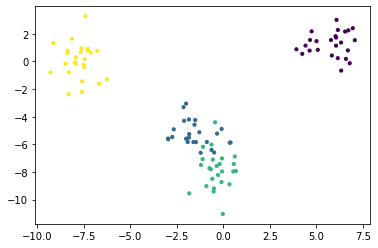

In [8]:
# Vamos usar a visualização das instâncias como base para o nosso array.
from matplotlib.pyplot import scatter
scatter(X[:,0], X[:,1], c=y, s=10)

In [9]:
import numpy as np
init = np.array([[-5, -8], [-3,6], [1, 2.5], [3,0]])
kmeans = KMeans(n_clusters=4,init=init, n_init=1).fit(X)
kmeans.inertia_

259.4138499700303

<h3 style='font-size:30px;font-style:italic'> Mini-batch K-Means</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como com o Incremental PCA e o Mini-batch Gradient Descent, o Mini-batch K-Means é recomendável para datasets que não cabem na memória. Em cada iteração, uma pequena parcela dos dados embasam a mudança de posição dos centróides.
        </li>
        <li> 
            Apesar de convergir mais rapidamente, esse algoritmo costuma ter inércias piores do que o K-Means tradicional para um mesmo número de clusters. 
        </li>
    </ul>
</div>

In [10]:
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=int(len(X)/5)).fit(X)

# Observe que a inércia do Mini-batch K-Means ficou pior.
mini_kmeans.inertia_

166.40696899081638

<h3 style='font-size:30px;font-style:italic'> Finding the Optimal Number of Clusters</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Em um dataset real, de inúmeras dimensões, encontrar o número ideal de clusters para o K-Means é algo dificultoso. Para isso, há o <em>silhouette score</em>, que mede o quanto os clusters estão bem segregados. Um valor de +1 indica que as instâncias estão bem inseridas em seus agrupamentos e longe dos demais; 0 alerta que os dados estão próximos a clusters vizinhos; por último, -1 sinaliza que as instâncias podem ter sido designadas aos agrupamentos errados.
        </li>
    </ul>
</div>

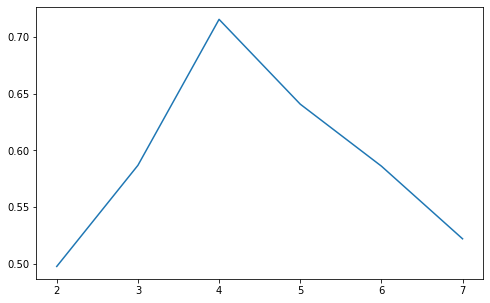

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# O dataset deste caso terá 5 centros.
X,y = make_blobs(n_samples=100, centers=5)

plt.figure(figsize=(8,5))
silhouettes = []
n_clusters_ = list(range(2,8))
# Vamos montar um gráfico que expõe os silhouette scores para diferentes 'n_clusters'.
for n_clusters in n_clusters_:
    kmeans = KMeans(n_clusters=n_clusters, n_init=15).fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(n_clusters_, silhouettes)

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Silhouette Diagram</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Os Silhouette Diagrams nos providenciam uma noção mais aprofundada sobre as características dos clusters formados.
        </li>
    </ul>
</div>

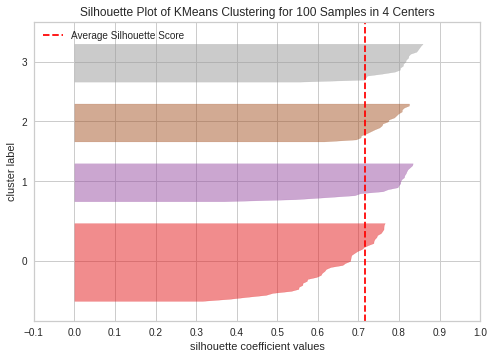

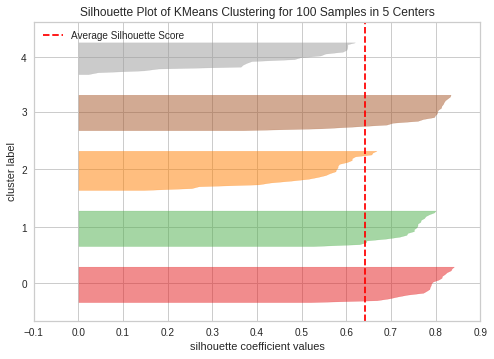

In [12]:
# Vamos utilizar a biblioteca Yellowbrick para montar as visualizações.
from yellowbrick.cluster import SilhouetteVisualizer

# Montando um Silhouette Diagram para cada valor de n_cluster.
n_clusters_ = list(range(4,6))

for n_clusters in n_clusters_:
    kmeans = KMeans(n_clusters=n_clusters, n_init=15)
    # Quando deixei 'is_fitted' como True com as devidas modificações, o código gerava um erro.
    visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick', is_fitted=False)
    visualizer.fit(X)
    visualizer.show()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            O comprimento das barras sinaliza quantas instâncias de cada cluster possuem o seu silhouette coefficient acima da silhouette score do K-Means (representada pela linha trecejada). A grossura das barras indica o tamanho do agrupamento em número de instâncias.
        </li>
        <li> 
            O melhor número de clusters é aquele em que as barras do Silhouette Diagram estejam além da linha tracejada e tenham uma grossura similar.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Limits of K-Means</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O K-Means possui limitações que devem ser consideradas. Ele pode não se dar bem em datasets com agrupamentos de diferentes densidades e tamanhos. Nesse contexto, outros modelos podem ser melhores.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Using Clustering for Image Segmentation</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            No campo de tratamento de imagens, é possível utilizar o K-Means para substituir tons de cores. Ele encontra pixels de intensidades similares e designa o centro do cluster como uma cor que generaliza todas as demais.
        </li>
    </ul>
</div>

In [13]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
image = imread('ladybug.png')
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=5).fit(X)

# Criando uma nova imagem com as cores médias de cada cluster.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

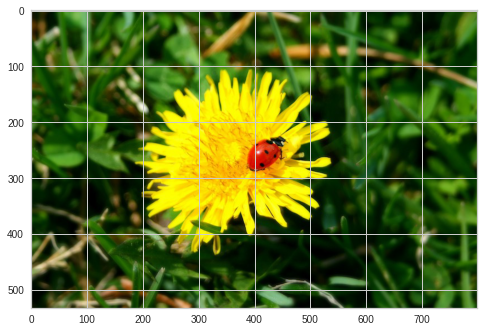

In [14]:
from matplotlib.pyplot import imshow
imshow(image)

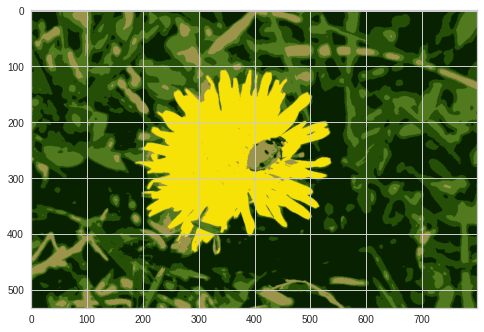

In [15]:
# Imagem simplificada.
imshow(segmented_img.reshape(image.shape))

<h3 style='font-size:30px;font-style:italic'> Using Clustering for Preprocessing</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Assim como o PCA, K-Means também é utilizado em reduções de dimensionalidade com o output do método transform. Vamos fazer uma aplicação no load_digits.
        </li>
    </ul>
</div>

In [16]:
# Vamos usar uma regressão logística no dataset original.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
X,y = load_digits(return_X_y=True)

# Criando sets de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Treinando a Regressão Logística e avaliando-a.
log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)
log_reg.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9711111111111111

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Agora, vamos aplicar o K-Means com 50 clusters. Não estamos definindo n_clusters como 10 pois dígitos podem ser escritos de maneiras diferentes.
        </li>
    </ul>
</div>

In [17]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
            ('kmeans_50', KMeans(n_clusters=50)),
            ('log_reg', LogisticRegression(random_state=42))])
pipeline.fit(X_train, y_train)

# Conseguimos melhorar o desempenho do algoritmo!
pipeline.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9577777777777777

In [18]:
# Poderíamos descobrir o melhor valor de k com um Grid Search.
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans_50__n_clusters=range(10,100,10))
grid_clf = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_clf.fit(X_train, y_train)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans_50', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'kmeans_50__n_clusters': range(10, 100, 10)})

In [19]:
# O melhor 'n_clusters' foi 90.
grid_clf.best_params_, grid_clf.best_score_

({'kmeans_50__n_clusters': 70}, 0.9621396117306897)

<h3 style='font-size:30px;font-style:italic'> Using Clustering for Semi-Supervised Learning</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O aprendizado semi supervisionado pode ser considerado uma ponte entre o não-supervisionado e o supervisionado. Inicialmente, identificamos padrões entre os dados não nomeados e oferecemos rótulos a eles. Com isso, fututas instâncias poderão ser categorizadas com as nomeações criadas. 
        </li>
    </ul>
</div>

In [20]:
# Vamos simular um aprendizado semi-supervisionado no load_digits.
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Agora, iremos criar 50 agrupamentos em 'X_train'. Pegaremos as instâncias mais próximas de cada centro, categorizando-as.
kmeans = KMeans(n_clusters=50).fit(X_train)

# Selecionando as instâncias representativas de cada cluster
X_representative_digits = X_train[np.argmin(kmeans.transform(X_train), axis=0)]

In [21]:
from matplotlib.cm import binary
def plot_digits(instances, images_per_row=10, **options):
    size = 8#28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = binary, **options)
    plt.axis("off")
    plt.tight_layout()

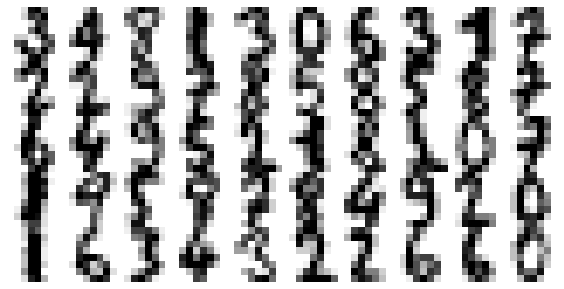

In [22]:
plot_digits(X_representative_digits, images_per_row=10)

In [23]:
# Com os números em mãos, vamos criar os seus rótulos. Por uma questão de tempo, irei dar uma trapaceada.
y_representative_digits = y_train[np.argmin(kmeans.transform(X_train), axis=0)]

In [24]:
y_representative_digits[0]

3

In [25]:
# Agora, testaremos a acurácia de uma Regressão Logística.
log_reg = LogisticRegression().fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9244444444444444

In [26]:
# Para se ter ideia das virtudes do aprendizado semi-supervisionado, se treinássemos a Regressão Logística em 50 instâncias aleatórias
# do set de treino (mesmo com 'y_train' em mãos!), a qualidade não seria a mesma.
log_reg = LogisticRegression().fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8266666666666667

<div> 
    <ul style='font-size:20px'> 
        <li> 
            O que foi apresentado evidencia a importância da qualidade dos dados em modelos preditivos. Estratégias como a seleção de instâncias representativas podem nos fornecer bons resultados mesmo com poucos dados em mãos.  
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Propagação dos labels representativos</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Uma outra abordagem sobre o nosso problema seria propagar o rótulo da instância representativa para todas as demais instâncias dos agrupamentos.  
        </li>
    </ul>
</div>

In [27]:
# Criando um 'y_train' modificado aos nossos desejos.
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(50):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [28]:
# A melhoria foi mínima, já que instâncias das fronteiras dos agrupamentos também foram rotuladas (possivelmente de maneira errada).
log_reg = LogisticRegression().fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9177777777777778

In [29]:
# Vamos selecionar, para cada cluster, apenas as 75% instâncias mais próximas do centro para treinarmos o modelo.
k = 50
percentile_closest = 75

X_digits_dist = kmeans.fit_transform(X_train)
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [30]:
log_reg = LogisticRegression().fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9244444444444444

<h2 style='font-size:30px'> DBSCAN</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O DBSCAN é um algoritmo de funcionamento mais flexível do que o K-Means. Isso porque não precisamos definir quantos agrupamentos esperamos encontrar.  
        </li>
        <li> 
            Para cada instância no espaço, caso haja <em> min_samples</em> vizinhas dentro de um raio com valor <em> epsilon</em>, ela passa a ser considerada como uma core instance. Assim, um agrupamento é criado. Note que um cluster pode conter mais de uma core instance.
        </li>
        <li> 
            Instâncias que não são core instances ou que não possuem uma core instance em sua vizinhança são consideradas anomalias.
        </li>
    </ul>
</div>

In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X,y = make_moons(n_samples=1000, noise=0.1)

# Treinando um DBSCAN com epsilon=0.5 e min_samples=5
dbscan = DBSCAN(eps=.1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.1)

In [2]:
# Todas as anomalias são rotuladas como -1 no atributo 'labels_'.
dbscan.labels_[:40]

array([ 0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1, -1,  0,
        0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  1,  1])

In [3]:
# 'core_sample_indices_' nos revela os índices das instâncias core.
print(dbscan.core_sample_indices_[:20])

# 'components_' expõe as coordenadas das core instances.
print(dbscan.components_[:20])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20]
[[ 1.72890831  0.02274886]
 [ 1.88653272  0.11989183]
 [ 0.95717483  0.01852814]
 [ 2.10965751  0.53113117]
 [ 0.46805044  0.0148621 ]
 [ 0.00439252  1.12515402]
 [-0.7481134   0.84453821]
 [ 0.37229393  1.04196178]
 [-1.01375899  0.18702878]
 [ 0.19436891 -0.04512781]
 [-0.01606295  0.32014438]
 [ 0.25901112  0.97820064]
 [ 0.91697714  0.25011057]
 [ 0.1114831  -0.13890763]
 [-0.08607607  0.9557708 ]
 [ 0.52692788 -0.12991914]
 [ 1.74968463 -0.02411064]
 [ 1.07426849  0.1495892 ]
 [ 1.0111342  -0.56944888]
 [ 2.06359909  0.37530394]]


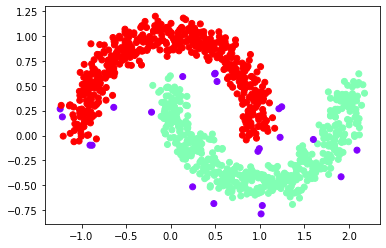

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1],c=dbscan.labels_, cmap='rainbow')

<h3 style='font-size:30px;font-style:italic'> Previsões com o DBSCAN</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A classe DBSCAN não oferece um método <em> predict</em>. Para classificarmos novas instâncias, seria necessário utilizar classificadores geométricos, como o KNN.  
        </li>
    </ul>
</div>

In [5]:
# Aqui, treinaremos o KNNClassifier com apenas os cluster centers. Não existe uma maneira correta de se fazer o 'fit'; tudo depende
# da situação.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [7]:
# O KNN nos retorna as probabilidades de cada classe.
X_new = np.array([[-0.5, 0], [0, 0.5], [-1, 0.1], [2,1]])
print(knn.predict_proba(X_new))

# Como um algoritmo geométrico, ele nos mostra também as distâncias das instâncias até os 'n_neighbors' mais próximos com 'kneighbors'.
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

[[0.34 0.66]
 [0.98 0.02]
 [0.   1.  ]
 [1.   0.  ]]


In [8]:
# Podemos usar esse método para refinarmos a nossa classificação. As instâncias a serem rotuladas podem estar distantes
# até mesmo de seus neighbors. Dessa forma, elas poderiam ser consideradas como outliers.

# Pegando os rótulos dos vizinhos das instâncias 'X_new'.
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# Todas as instâncias com uma distância maior do que 0.2 em relação a seus neighbors serão classificadas como outliers.
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

<h2 style='font-size:30px'> Other Clustering Algorithms</h2>

<h3 style='font-size:30px;font-style:italic'> Affinity Propagation</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Nele, as instâncias elegem outras instâncias como suas representantes, dependendo do grau de similaridade que tiverem. Ao final, os dados representativos e seus "eleitores" formam um agrupamento.  
        </li>
        <li> 
            Como o DBSCAN, você não precisa informar o número de clusters esperado.
        </li>
    </ul>
</div>

In [23]:
from sklearn.cluster import AffinityPropagation
aff_prop = AffinityPropagation(damping=0.5, random_state=42)
aff_prop.fit(X)

AffinityPropagation(random_state=42)

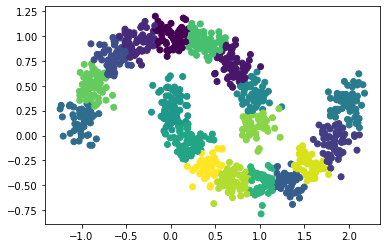

In [24]:
# No caso de nosso dataset, ele não foi bem...
plt.scatter(X[:,0], X[:,1], c=aff_prop.predict(X))

<h3 style='font-size:30px;font-style:italic'> Agglomerative Clustering</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Nesse algoritmo, cada instância é inicialmente considerada um cluster. Os agrupamentos são aglutinados com base em suas distâncias até que restem <em>n_clusters</em> clusters.  
        </li>
        <li> 
            O argumento <em> linkage</em> determina que tipo de distância o modelos usará (distância média entre os pontos; distância máxima existente entre duas instâncias pertencentes aos clusters).
        </li>
    </ul>
</div>

In [36]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster_clusters = AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(X)

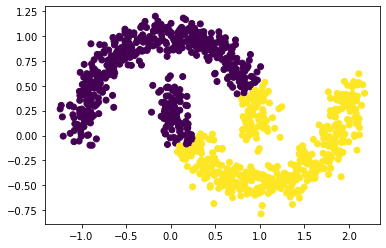

In [37]:
# Não ficou tão ruim! Note que se tivéssemos identificado e removido outliers com o DBSCAN, poderíamos ter obtido um 
# resultado quase perfeito!
plt.scatter(X[:,0], X[:,1], c= agg_cluster_clusters)

In [ ]:
# Seguir com a lista dos modelos: https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

<p style='color:red'> Gaussian Mixtures